In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv('Task 2.csv')

In [5]:
df.head()

,product_A_qty,product_B_qty,product_C_qty,product_D_qty,product_E_qty,product_F_qty,product_G_qty,product_H_qty,product_I_qty,product_J_qty,warehouse_id
0,10.0,94.0,46.0,82.0,286.0,20.0,137.0,76.0,273.0,181.0,W1
1,131.0,209.0,268.0,285.0,172.0,211.0,188.0,157.0,203.0,263.0,W2
2,380.0,93.0,400.0,276.0,226.0,336.0,274.0,116.0,203.0,239.0,W3
3,1.0,139.0,76.0,330.0,107.0,159.0,24.0,186.0,280.0,77.0,W4
4,253.0,78.0,161.0,338.0,258.0,201.0,131.0,210.0,351.0,177.0,W5


In [42]:
df.shape

(10000, 12)

In [7]:
df.isnull().sum()

product_A_qty      0
product_B_qty      0
product_C_qty    100
product_D_qty      0
product_E_qty      0
product_F_qty      0
product_G_qty      0
product_H_qty      0
product_I_qty      0
product_J_qty      0
warehouse_id       0
dtype: int64

In [9]:
df['product_C_qty'].fillna(df['product_C_qty'].mean(), inplace=True)


C:\Users\Dell\AppData\Local\Temp\ipykernel_34024\623551856.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['product_C_qty'].fillna(df['product_C_qty'].mean(), inplace=True)


In [11]:
warehouse_ids = df['warehouse_id']
df_features = df.drop(columns=['warehouse_id'])


In [13]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_features)


In [92]:
inertia = []
k_range = range(1, 25)
for k in k_range:
    kmeans = KMeans(n_clusters=k,random_state=42, n_init=100)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

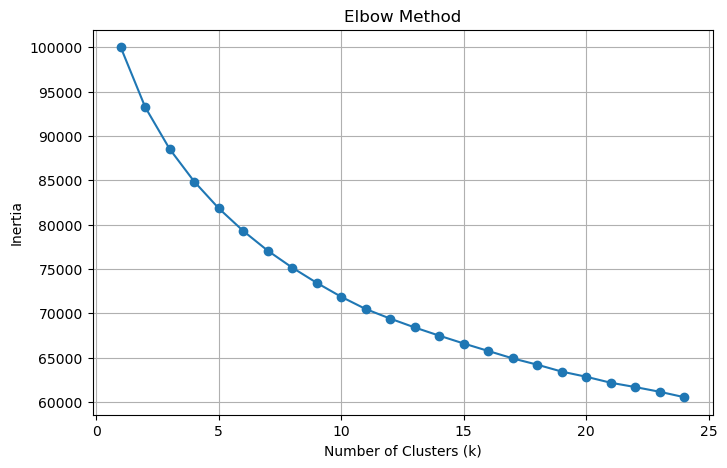

In [93]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

In [94]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_data)


df['Cluster'] = clusters
clusters=pd.DataFrame(clusters)

In [95]:
clusters


,0
0,1
1,0
2,0
3,1
4,1
...,...
9995,4
9996,3
9997,0
9998,4


In [96]:
from sklearn.metrics import silhouette_score
labels = kmeans.fit_predict(scaled_data)
score = silhouette_score(scaled_data, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.06048547189817968
